In [2]:
import matplotlib.pyplot as plt
import numpy as np 

#### Intro
The Purpose of the following Notebook is to show how there is an infinite loop occuring for different solutions presented by various optimisation functions applied to the Calculo_Direto_SMmodel_GA_com_erro_de_ajuste_v2 function in MATLAB for finding a suitable model of soil moisture. 

While using the fmincon function from MATLAB, we observe a model solution, but with $R^2$ < 1, and hence another algorithm search was sought after.

We had since applied 3 optimisation functions to the model and the results had varied but none had presented a suitably better model with resepect to $R^2$

The optimisation functions that we had applied to the model were the following: fmincon, ga, particalSwarm and patternSearch.   

In each chapter, a new set of the initialised variables, Psi, F_p and Ks_sup are set as determined by the Calculo_Direto_SMmodel_GA_com_erro_de_ajuste_v2 function after being handelled by our optimisation function of choice, this plays a key role as can be seen later

In [3]:
def F1(F, Psi, F_p,Ks_sup,name): # function to take the range over which we 
    
    f1 = F_p - Psi*np.log( (F - Psi) /( F_p - Psi ))+ Ks_sup
    y = abs( (F-f1)/F )
    
    plt.plot(F,y, label = "Relative Error")
    plt.hlines(0.1,0,len(F*(F[1]-F[0])), color = "k", linestyle = "--", label = "threshold")
    plt.ylim([0,2])
    plt.title(str(name) + " relative error")
    plt.xlabel("t")
    plt.ylabel("Relative Error")
    plt.legend()
    plt.grid()
    plt.show()
    

## fmincon - Finding minimum of constrained nonlinear multivariable function
After applying the "ga" (genetic algorithm from MATLAB) function to take the place of the fmincon, we observe an infinite loop in the following function's main iteration,Calculo_Direto_SMmodel_GA_com_erro_de_ajuste_v2. This is couased by the while loops conditional check of the relative error being less than 1%.

The problem arrises due to how the function iterates through the two terms it is comparing. In the initial fmincon utilisation the initial conditions given satisfy a range of suitible solutions for the completion of the algorithms main funciton. 

This can be seen clearly by the range of values of the relative error below the threshold line in the plot below

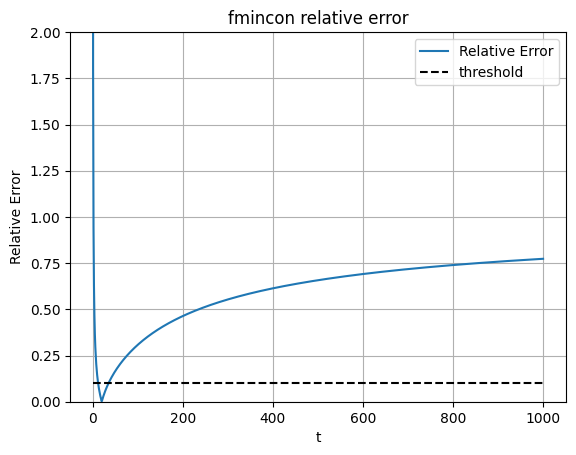

In [4]:
F = np.arange(0.1,1000,1)
Psi = -90
F_p = 0.4
Ks_sup = 2
F1(F,Psi,F_p,Ks_sup,"fmincon")

### GA - Genetic Algorithms 
The same cannot be said with the ga, as the relative error of the model can be seen to never reach our threshold. 

$$ \text{given } \delta > 0 , \not \exists \epsilon : |\epsilon - F_1(t)| < \delta , \forall t$$



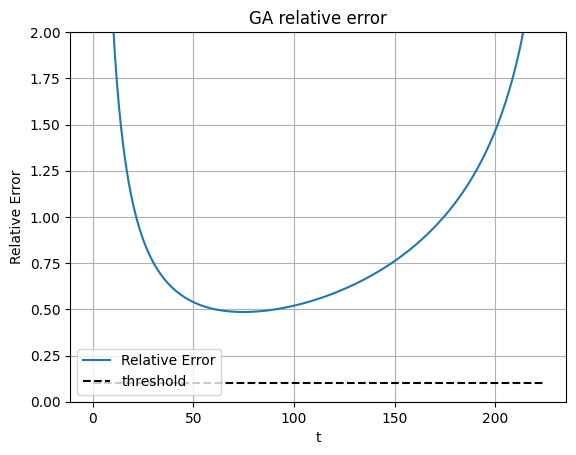

In [5]:
F = np.arange(0.1,224,1)
Psi = 229.1572
F_p = 0.4
Ks_sup = 20.5606

F1(F,Psi,F_p,Ks_sup,"GA")

## Partical Swarm Optimisation
Much like GA, the Partical Swarm function was unable to render any solution as the initialiations of the variables proved to be such that the function could not aproach the threshold value

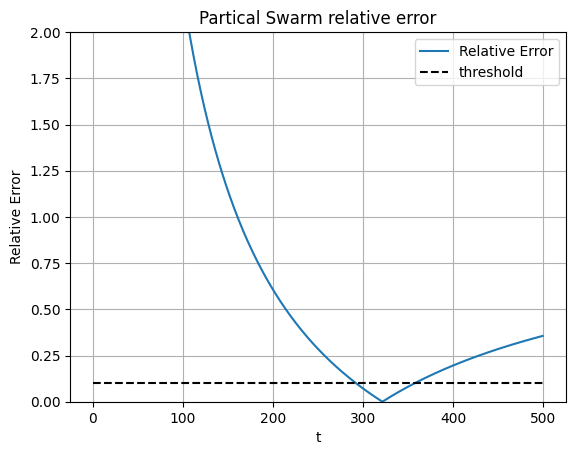

In [6]:
F = np.arange(0.1,500,1) 
Psi = 0
F_p = 0.4
Ks_sup = 321
F1(F,Psi,F_p,Ks_sup,"Partical Swarm")

For the second iteration of the Partical swarm model, we see that the model is not heuristic and takes 1000 times the iteratios needed to converge than the previous and other models, hence this model is not suitable

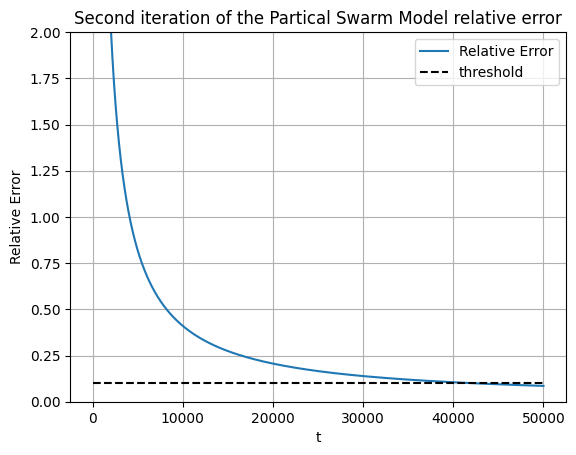

In [7]:
F = np.arange(0.1,50000,1) 
Psi = 6.898264861160130e+06
F_p = 0.4
Ks_sup = 4.096712841012205e+03
name = "Second iteration of the Partical Swarm Model"

f1 = F_p - Psi*np.log( (F - Psi) /( F_p - Psi ))+ Ks_sup
y = abs( (F-f1)/F )

plt.plot(F,y, label = "Relative Error")
plt.hlines(0.1,0,len(F*(F[1]-F[0])), color = "k", linestyle = "--", label = "threshold")
plt.title(str(name) + " relative error")
plt.ylim([0,2])
plt.xlabel("t")
plt.ylabel("Relative Error")
plt.legend()
plt.grid()
plt.show()


## Pattern Search Optimisation
Initially, and for the first few iterations we see solutions for this optimisation model. However as the itaerations continue we aproach the same problem as the previous methods and eventually are rendered unable to proceed due to initialisation of parameters again.

In fact, for the case of the Pattern Search Function and the initial coditions supplied, we see that the supremum of the error is the limit as t $\rightarrow \infty$, which is greater than the threshold hence no solution can be found and is generating our infinite loop.

$$ \sup( f(t) )  = \sup ( | \frac{ F - F1}{F}  |) = lim_{t \rightarrow \infty}{f(t)} = 1 > 0.1$$

#### There are 4 cases to observe with the patter search algoithm. 
1: Initial Solution that provides answer

2: Second Solution that provides answer

3: Final Solution that provides answer

4: Last Iteraation that doesnt provide answer

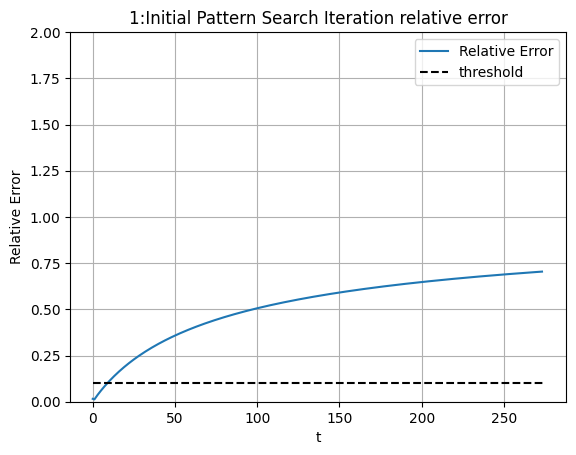

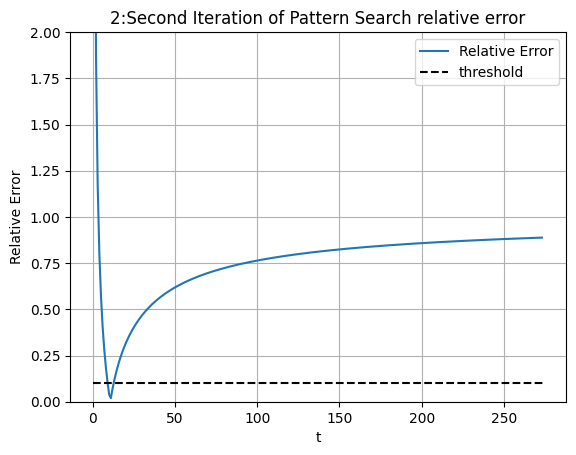

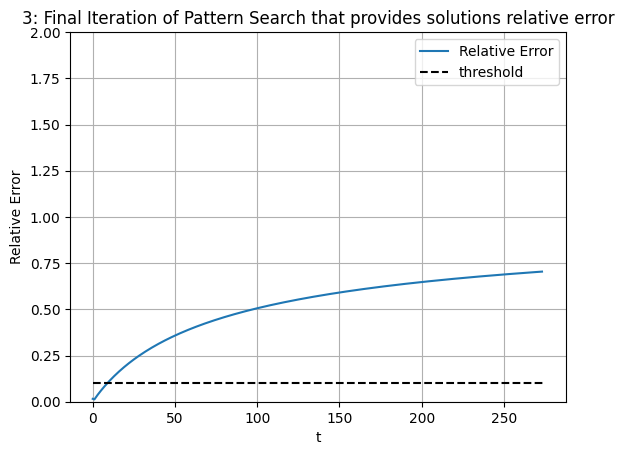

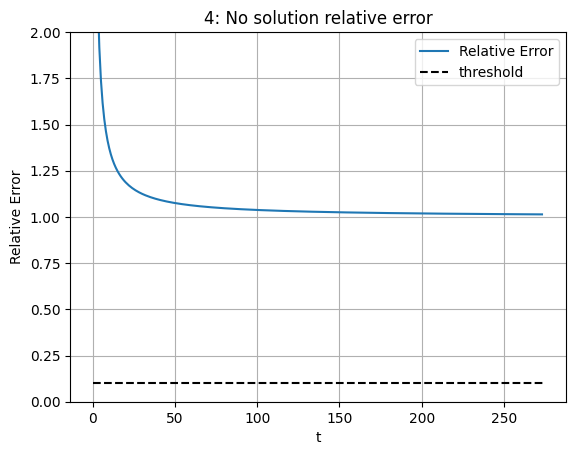

In [8]:
F = np.arange(0.1,274,1) 
PsiList = [  -38.7568,   -7.2038,  -38.7568, 0]
F_pList = [0,0,0, 0.4]
Ks_supList = [0.0017,4.1675,0.0017, -4.16]
nameList = ["1:Initial Pattern Search Iteration", "2:Second Iteration of Pattern Search", "3: Final Iteration of Pattern Search that provides solutions", "4: No solution"]

for i in range(4):
    F1(F,PsiList[i],F_pList[i],Ks_supList[i],nameList[i])

Unfortuantely for the Pattern Search algorithm solutions, there is no case where the Pattern Search solution has a greater $R^2$ or $NS$ values than the fmincon solutions and hence is rejected with the rest of the above algorithms